# Importing libraries

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
import pylab as pl 

# Importing data

In [5]:
path = r'C:\Users\asicz\OneDrive\Dokumenty\CareerFoundry_Data_Analyst_Course\Data Immersion\Achievement 6'
evo_data=pd.read_csv(os.path.join(path, 'corrected_evo_data.csv'), index_col = False)

In [21]:
%matplotlib inline

# Preparing data

In [172]:
# Keep only the numerical variables
numerical_data = evo_data.select_dtypes(include=['number'])
numerical_data

,Time,Cranial_Capacity,Height
0,6.041124,144.51410,110.24323
1,4.383910,293.96021,107.69018
2,3.749413,264.79849,123.76644
3,4.595606,403.28047,111.40831
4,3.614060,679.15233,111.59004
...,...,...,...
11995,3.354085,676.92547,112.88961
11996,3.969730,560.41705,105.13137
11997,0.213857,222.91130,95.29501
11998,2.859186,466.86762,101.01866


#### I tried to run the clustering without standardization and it looked worse, therefore I decide to keep the scaling of the variables for this analysis (as they are anyways in different ranges).

In [174]:
# Scale the data
features = ['Time', 'Cranial_Capacity', 'Height']

# Standardize the data
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data[features])
numerical_data_scaled = pd.DataFrame(numerical_data_scaled, columns=features)
numerical_data_scaled 

,Time,Cranial_Capacity,Height
0,1.974456,-1.325742,-0.864326
1,1.041825,-0.906257,-0.968370
2,0.684749,-0.988112,-0.313216
3,1.160962,-0.599403,-0.816845
4,0.608577,0.174951,-0.809439
...,...,...,...
11995,0.462271,0.168700,-0.756478
11996,0.808738,-0.158331,-1.072648
11997,-1.304956,-1.105687,-1.473508
11998,0.183756,-0.420918,-1.240253


# The elbow technique for k-means

In [176]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [178]:
score = [kmeans[i].fit(numerical_data_scaled ).score(numerical_data_scaled ) for i in range(len(kmeans))] 
score

[-36000.000000000044,
 -14214.166269262161,
 -8883.241512013214,
 -7288.705124602673,
 -5333.970219411998,
 -4421.976828093018,
 -3968.965802748225,
 -3352.4525153872823,
 -3051.2450813532646]

Text(0.5, 1.0, 'Elbow Curve')

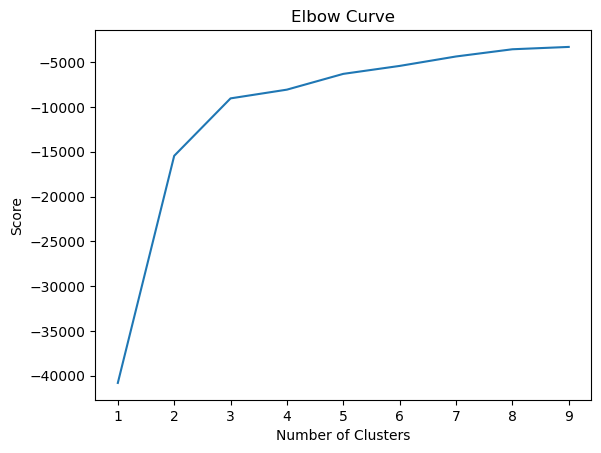

In [105]:
# Plot the elbow curve 
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')

#### As the elbow graph doesn't reach a very definite plateau I found it challenging to find the right number of clusters.
#### In the end, I decided to run the analysis with 3 clusters as the optimal number. I tried to run it with 4, 5, 6 and 7 clusters and I wasn't happy with the data separation.

# k-means clustering

In [270]:
# Create the k-means object
kmeans = KMeans(n_clusters = 3) 

In [272]:
# Fit the k-means object to the data
kmeans.fit(numerical_data_scaled )

KMeans(n_clusters=3)

In [274]:
# Append the column to the numerical data frame with assigned cluster number
numerical_data_scaled['Cluster_No'] = kmeans.fit_predict(numerical_data_scaled[['Time', 'Cranial_Capacity', 'Height']])

In [276]:
numerical_data_scaled.head(20)

,Time,Cranial_Capacity,Height,Cluster_No
0,1.974456,-1.325742,-0.864326,0
1,1.041825,-0.906257,-0.968370,0
2,0.684749,-0.988112,-0.313216,0
3,1.160962,-0.599403,-0.816845,0
4,0.608577,0.174951,-0.809439,2
5,-1.042936,1.511412,0.542978,1
6,0.707015,-0.874389,0.286320,0
7,2.824714,-1.007060,-1.639121,0
8,-1.117290,1.513655,1.086130,1
9,0.927586,-0.440025,-0.574430,0


In [278]:
# Check the size of each cluster
numerical_data_scaled ['Cluster_No'].value_counts()

Cluster_No
2    5246
1    3820
0    2934
Name: count, dtype: int64

Text(0.5, 1.0, 'k-means Clustered Cranial Capacity vs Time')

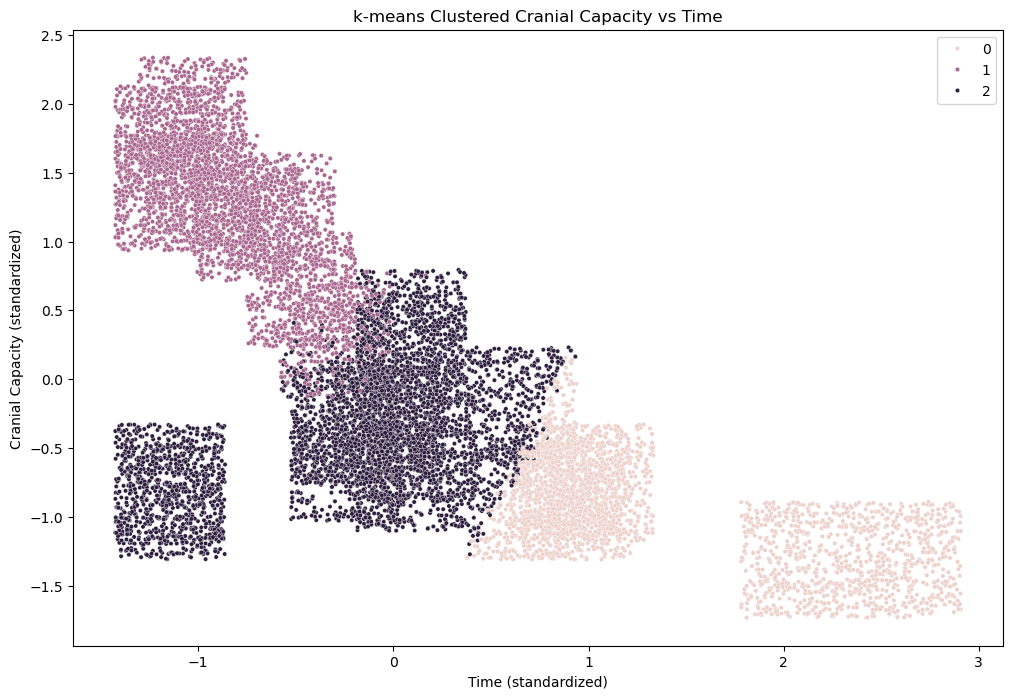

In [282]:
# Plot the clusters for the Cranial Capacity and Time variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numerical_data_scaled ['Time'], y=numerical_data_scaled ['Cranial_Capacity'], hue=kmeans.labels_, s=10) 

ax.grid(False) 
plt.xlabel('Time (standardized)') 
plt.ylabel('Cranial Capacity (standardized)') 
plt.title("k-means Clustered Cranial Capacity vs Time")

#### The data divided into 3 clusters look quite ok, although there could be more information in the patches that fall outside of the main cluster shape.
#### When I ran the clustering with higher amount of clusters, these patches weren't though identified as separate clusters. Therefore, there might be a better type of analysis that could explain these outgroups. 
#### Also let's keep in mind that there are many non-numerical data in this data set which can be contributing to these observations.

Text(0.5, 1.0, 'k-means Clusters on Cranial Capacity vs Height')

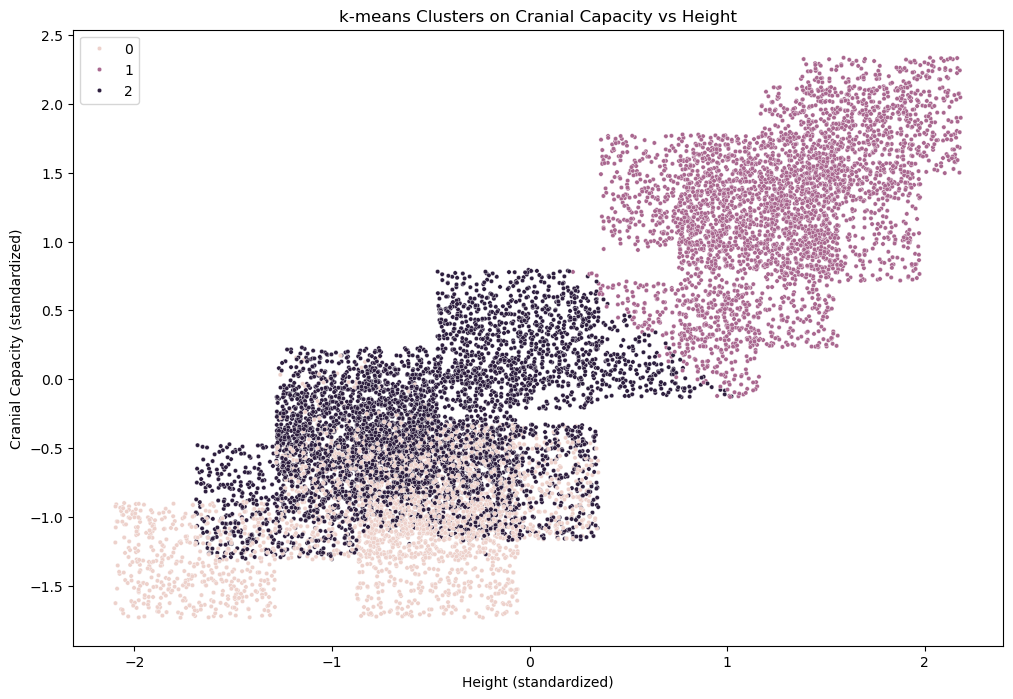

In [285]:
# Plot the clusters for the Height and Cranial Capacity variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numerical_data_scaled ['Height'], y=numerical_data_scaled ['Cranial_Capacity'], hue=kmeans.labels_, s=10)

ax.grid(False) 
plt.xlabel('Height (standardized)') 
plt.ylabel('Cranial Capacity (standardized)') 
plt.title("k-means Clusters on Cranial Capacity vs Height")

#### In the representation above (Cranial Capacity vs Height), one can see that the data points of different clusters intermingle much more than when we plot Cranial Capacity vs Time. Therefore, we could conclude that the Time component is more important than Height for this data set.

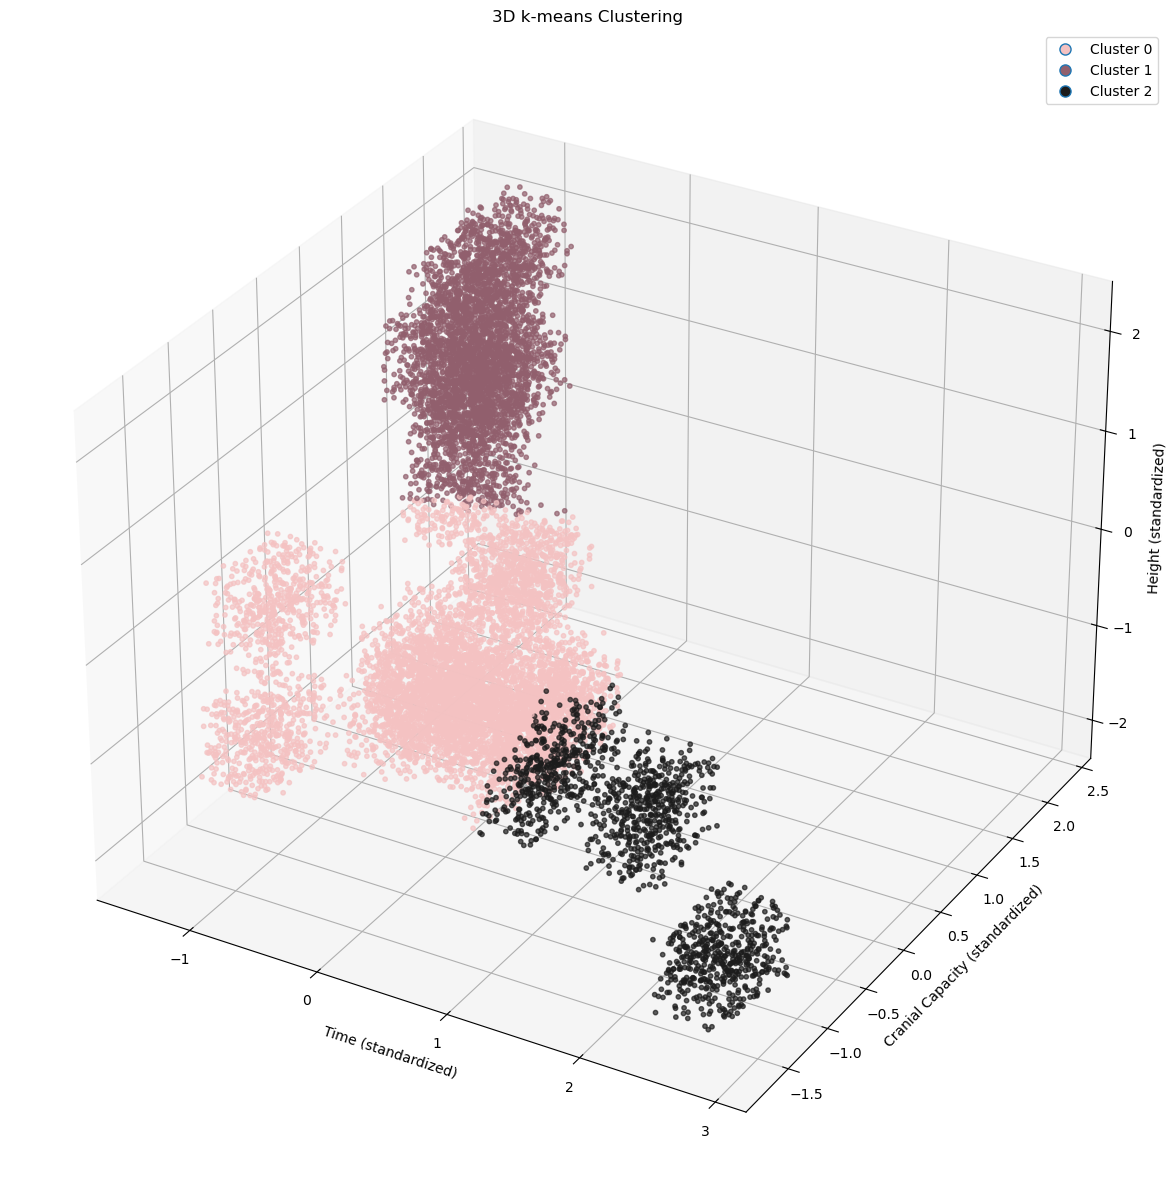

In [147]:
# Plot the 3D representation of all numerical variables and clusters
x = numerical_data_scaled['Time'] 
y = numerical_data_scaled['Cranial_Capacity'] 
z = numerical_data_scaled['Height']  
clusters = kmeans.labels_  # Cluster labels

# Define custom colors for clusters
cluster_colors = {0: '#F4C2C2', 1: '#915F6D', 2: '#1C1C1C'}  

# Convert numerical cluster labels to actual colors
colors = [cluster_colors[label] for label in kmeans.labels_]

# Create 3D figure
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using the assigned colors
sc = ax.scatter(numerical_data_scaled['Time'], 
                numerical_data_scaled['Cranial_Capacity'], 
                numerical_data_scaled['Height'], 
                color=colors, 
                s=10, alpha=0.7)

# Labels
ax.set_xlabel('Time (standardized)')
ax.set_ylabel('Cranial Capacity (standardized)')
ax.set_zlabel('Height (standardized)')
ax.set_title('3D k-means Clustering')

# Manually create legend with correct colors
legend_labels = sorted(cluster_colors.keys())  
legend = ax.legend(handles=[plt.Line2D([0], [0], marker='o', linestyle='None', 
                                        markerfacecolor=cluster_colors[i], markersize=8) 
                            for i in legend_labels], 
                   labels=[f"Cluster {i}" for i in legend_labels], loc="upper right")

#### On this 3D graph we can see a good data separation in the 3 clusters in the context of all 3 numerical variables.
#### However, we also see that there are more little subgroups within the clusters, which separation wasn't achieved by k-means clustering with higher numbers of clusters. Therefore, we may try to involve the categorical variables and other analytical methods in further analysis.

In [288]:
# We want to analyze some basic stats of each cluster
numerical_data_scaled.loc[numerical_data_scaled['Cluster_No'] == 2, 'Cluster_No'] = 'dark purple'
numerical_data_scaled.loc[numerical_data_scaled['Cluster_No'] == 1, 'Cluster_No'] = 'purple'
numerical_data_scaled.loc[numerical_data_scaled['Cluster_No'] == 0, 'Cluster_No'] = 'pink'

C:\Users\asicz\AppData\Local\Temp\ipykernel_15764\1657298254.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'dark purple' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  numerical_data_scaled.loc[numerical_data_scaled['Cluster_No'] == 2, 'Cluster_No'] = 'dark purple'


In [290]:
numerical_data_scaled.groupby('Cluster_No').agg({'Cranial_Capacity':['mean', 'median'], 
                         'Time':['mean', 'median'], 
                         'Height':['mean', 'median']})

Cranial_Capacity                Time              Height          
                        mean    median      mean    median      mean    median
Cluster_No                                                                    
dark purple        -0.366453 -0.413432 -0.176661 -0.064141 -0.529399 -0.547098
pink               -0.977942 -0.993129  1.395212  1.050310 -0.706738 -0.610318
purple              1.254370  1.305360 -0.829002 -0.862975  1.269843  1.283072

#### In the table above we can see how the data is separated. The 3 clusters correspond to the 3 following trends:
#### - the purple cluster would correspond to the biggest brain size, most recent evolutionary time and the tallest hominins
#### - the pink cluster corresponds to the smallest brain, most distant evolutionary time and the shortest hominins
#### - the dark purple cluster contains all the values that fall in the middle, so mediun brain size, evolutionary time between very distant and recent human relatives and medium height.

#### All the results together point towards a dependency of Time and Cranial Capacity as well as Height and Cranial Capacity. 
#### Nevertheless, there are patterns in the data that remain unexplained by k-means clustering and require additional analytical steps. We will need to use other variables (categorical) to dissect in depth the possible links to the rapid brain size increase which we observe in the recent evolutionary past.